In [1]:
import numpy as np 
import pandas as pd 
import pprint,random

from scipy.ndimage import shift
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD

In [2]:
class tic_tac_toe_game(object):
    def __init__(self):
        self.board=np.full((3,3),2)

    def toss(self):
        turn=np.random.randint(0,2,size=1)
        if turn.mean()==0:
            self.turn_monitor=0
        elif turn.mean()==1:
            self.turn_monitor=1
        return self.turn_monitor

    def move(self,player,coord):
        if self.board[coord]!=2 or self.game_status()!="In Progress" or self.turn_monitor!=player:
            raise ValueError("Invalid move")
        self.board[coord]=player
        self.turn_monitor=1-player
        return self.game_status(),self.board


    def game_status(self):
        #check for a win along rows
        for i in range(self.board.shape[0]):
            if 2 not in self.board[i,:] and len(set(self.board[i,:]))==1:
                return "Won"
        #check for a win along columns
        for j in range(self.board.shape[1]):
            if 2 not in self.board[:,j] and len(set(self.board[:,j]))==1:
                return "Won"
        # check for a win along diagonals
        if 2 not in np.diag(self.board) and len(set(np.diag(self.board)))==1:
            return "Won"
        if 2 not in np.diag(np.fliplr(self.board)) and len(set(np.diag(np.fliplr(self.board))))==1:
            return "Won"
        # check for a Draw
        if not 2 in self.board:
            return "Drawn"
        else:
            return "In Progress"

In [3]:
# create an object of the class tick_tac_toe_game
game=tic_tac_toe_game()
# toss to decide which player goes first
game.toss()
print("Player ",game.turn_monitor," has won the toss")

# make the first move
print("Initial board state \n",game.board)
print("Let first player place their mark on 0,0")
game_status,board=game.move(game.turn_monitor,(0,0))

print("New Board State: \n",board)
print("Let second player place their mark on 0,1")
game_status,board=game.move(game.turn_monitor,(0,1))

print("New Board State: \n",board)
print("Let first player place their mark on 1,1")
game_status,board=game.move(game.turn_monitor,(1,1))

print("New Board State: \n",board)
print("Let second player place their mark on 0,2")
game_status,board=game.move(game.turn_monitor,(0,2))

print("New Board State: \n",board)
print("Let first player place their mark on 2,2")
game_status,board=game.move(game.turn_monitor,(2,2))

print("New Board State: \n",board)
print("Player ",1-game.turn_monitor," Has ",game_status)

Player  0  has won the toss
Initial board state 
 [[2 2 2]
 [2 2 2]
 [2 2 2]]
Let first player place their mark on 0,0
New Board State: 
 [[0 2 2]
 [2 2 2]
 [2 2 2]]
Let second player place their mark on 0,1
New Board State: 
 [[0 1 2]
 [2 2 2]
 [2 2 2]]
Let first player place their mark on 1,1
New Board State: 
 [[0 1 2]
 [2 0 2]
 [2 2 2]]
Let second player place their mark on 0,2
New Board State: 
 [[0 1 1]
 [2 0 2]
 [2 2 2]]
Let first player place their mark on 2,2
New Board State: 
 [[0 1 1]
 [2 0 2]
 [2 2 0]]
Player  0  Has  Won


In [4]:
def legal_moves_generator(current_board_state,turn_monitor):
    legal_moves_dict={}
    for i in range(current_board_state.shape[0]):
        for j in range(current_board_state.shape[1]):
            if current_board_state[i,j]==2:
                board_state_copy=current_board_state.copy()
                board_state_copy[i,j]=turn_monitor
                legal_moves_dict[(i,j)]=board_state_copy.flatten()
    return legal_moves_dict

In [5]:
game=tic_tac_toe_game()
game.toss()
print("Player ",game.turn_monitor," has won the toss")
print("Current board state \n",game.board)
legal_moves_dict=legal_moves_generator(game.board,game.turn_monitor)
print("Dictionary of Possible Next Legal Moves:")
pprint.pprint(legal_moves_dict)

Player  0  has won the toss
Current board state 
 [[2 2 2]
 [2 2 2]
 [2 2 2]]
Dictionary of Possible Next Legal Moves:
{(0, 0): array([0, 2, 2, 2, 2, 2, 2, 2, 2]),
 (0, 1): array([2, 0, 2, 2, 2, 2, 2, 2, 2]),
 (0, 2): array([2, 2, 0, 2, 2, 2, 2, 2, 2]),
 (1, 0): array([2, 2, 2, 0, 2, 2, 2, 2, 2]),
 (1, 1): array([2, 2, 2, 2, 0, 2, 2, 2, 2]),
 (1, 2): array([2, 2, 2, 2, 2, 0, 2, 2, 2]),
 (2, 0): array([2, 2, 2, 2, 2, 2, 0, 2, 2]),
 (2, 1): array([2, 2, 2, 2, 2, 2, 2, 0, 2]),
 (2, 2): array([2, 2, 2, 2, 2, 2, 2, 2, 0])}


In [6]:
model = Sequential()
model.add(Dense(18, input_dim=9,kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(9, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,kernel_initializer='normal'))

lr = 0.001
momentum = 0.8

sgd = SGD(learning_rate=lr, momentum=momentum,nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                180       
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
def move_selector(model,current_board_state,turn_monitor):
    tracker={}
    legal_moves_dict=legal_moves_generator(current_board_state,turn_monitor)
    for legal_move_coord in legal_moves_dict:
        score=model.predict(legal_moves_dict[legal_move_coord].reshape(1,9))
        tracker[legal_move_coord]=score
    selected_move=max(tracker, key=tracker.get)
    new_board_state=legal_moves_dict[selected_move]
    score=tracker[selected_move]
    return selected_move,new_board_state,score

In [8]:
# new game
game=tic_tac_toe_game()
# toss
game.toss()
# choose the first move
print("Player assigned mark 1",game.turn_monitor," won the toss")
print("Initial board state:")
print(game.board)
selected_move,new_board_state,score=move_selector(model,game.board,game.turn_monitor)
print("Selected move: ",selected_move)
print("Resulting new board state: ",new_board_state)
print("Score assigned to above board state by Evaluator(model): ", score)

Player assigned mark 1 1  won the toss
Initial board state:
[[2 2 2]
 [2 2 2]
 [2 2 2]]
1/1 [==============================] - 0s 12ms/step
Selected move:  (1, 1)
Resulting new board state:  [2 2 2 2 1 2 2 2 2]
Score assigned to above board state by Evaluator(model):  [[0.00123016]]


In [9]:
def row_winning_move_check(current_board_state,legal_moves_dict,turn_monitor):
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        #check for a win along rows
        for i in range(current_board_state_copy.shape[0]):
            if 2 not in current_board_state_copy[i,:] and len(set(current_board_state_copy[i,:]))==1:
                selected_move=legal_move_coord
                return selected_move

In [10]:
def column_winning_move_check(current_board_state,legal_moves_dict,turn_monitor):
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        for j in range(current_board_state_copy.shape[1]):
                    if 2 not in current_board_state_copy[:,j] and len(set(current_board_state_copy[:,j]))==1:
                        selected_move=legal_move_coord
                        return selected_move

In [11]:
def diag1_winning_move_check(current_board_state,legal_moves_dict,turn_monitor):
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 2 not in np.diag(current_board_state_copy) and len(set(np.diag(current_board_state_copy)))==1:
            selected_move=legal_move_coord
            return selected_move

In [12]:
def diag2_winning_move_check(current_board_state,legal_moves_dict,turn_monitor):
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 2 not in np.diag(np.fliplr(current_board_state_copy)) and len(set(np.diag(np.fliplr(current_board_state_copy))))==1:
            selected_move=legal_move_coord
            return selected_move

In [13]:
def row_block_move_check(current_board_state,legal_moves_dict,turn_monitor):
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        for i in range(current_board_state_copy.shape[0]):
            if 2 not in current_board_state_copy[i,:] and (current_board_state_copy[i,:]==1).sum()==2:
                if not (2 not in current_board_state[i,:] and (current_board_state[i,:]==1).sum()==2):
                    selected_move=legal_move_coord
                    return selected_move

In [14]:
def column_block_move_check(current_board_state,legal_moves_dict,turn_monitor):
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        
        for j in range(current_board_state_copy.shape[1]):
                    if 2 not in current_board_state_copy[:,j] and (current_board_state_copy[:,j]==1).sum()==2:
                        if not (2 not in current_board_state[:,j] and (current_board_state[:,j]==1).sum()==2):
                            selected_move=legal_move_coord
                            return selected_move

In [15]:
def diag1_block_move_check(current_board_state,legal_moves_dict,turn_monitor):
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor    
        if 2 not in np.diag(current_board_state_copy) and (np.diag(current_board_state_copy)==1).sum()==2:
                if not (2 not in np.diag(current_board_state) and (np.diag(current_board_state)==1).sum()==2):
                    selected_move=legal_move_coord
                    return selected_move

In [16]:
def diag2_block_move_check(current_board_state,legal_moves_dict,turn_monitor):
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 2 not in np.diag(np.fliplr(current_board_state_copy)) and (np.diag(np.fliplr(current_board_state_copy))==1).sum()==2:
            if not (2 not in np.diag(np.fliplr(current_board_state)) and (np.diag(np.fliplr(current_board_state))==1).sum()==2):
                selected_move=legal_move_coord
                return selected_move

In [17]:
def row_second_move_check(current_board_state,legal_moves_dict,turn_monitor):
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        
        for i in range(current_board_state_copy.shape[0]):
            if 1 not in current_board_state_copy[i,:] and (current_board_state_copy[i,:]==0).sum()==2:
                if not (1 not in current_board_state[i,:] and (current_board_state[i,:]==0).sum()==2):
                    selected_move=legal_move_coord
                    return selected_move

In [18]:
def column_second_move_check(current_board_state,legal_moves_dict,turn_monitor):
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        
        for j in range(current_board_state_copy.shape[1]):
                    if 1 not in current_board_state_copy[:,j] and (current_board_state_copy[:,j]==0).sum()==2:
                        if not (1 not in current_board_state[:,j] and (current_board_state[:,j]==0).sum()==2):
                            selected_move=legal_move_coord
                            return selected_move

In [19]:
def diag1_second_move_check(current_board_state,legal_moves_dict,turn_monitor): 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 1 not in np.diag(current_board_state_copy) and (np.diag(current_board_state_copy)==0).sum()==2:
            if not (1 not in np.diag(current_board_state) and (np.diag(current_board_state)==0).sum()==2):
                selected_move=legal_move_coord
                return selected_move

In [20]:
def diag2_second_move_check(current_board_state,legal_moves_dict,turn_monitor): 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 1 not in np.diag(np.fliplr(current_board_state_copy)) and (np.diag(np.fliplr(current_board_state_copy))==0).sum()==2:
            if not (1 not in np.diag(np.fliplr(current_board_state)) and (np.diag(np.fliplr(current_board_state))==0).sum()==2):
                selected_move=legal_move_coord
                return selected_move

In [21]:
def opponent_move_selector(current_board_state,turn_monitor,mode):
    legal_moves_dict=legal_moves_generator(current_board_state,turn_monitor)
    
    winning_move_checks=[row_winning_move_check,column_winning_move_check,diag1_winning_move_check,diag2_winning_move_check]
    block_move_checks=[row_block_move_check,column_block_move_check,diag1_block_move_check,diag2_block_move_check]
    second_move_checks=[row_second_move_check,column_second_move_check,diag1_second_move_check,diag2_second_move_check]

    if mode=="Hard":
        random.shuffle(winning_move_checks)
        random.shuffle(block_move_checks)
        random.shuffle(second_move_checks)        
        
        for fn in winning_move_checks:
            if fn(current_board_state,legal_moves_dict,turn_monitor):
                return fn(current_board_state,legal_moves_dict,turn_monitor)
            
        for fn in block_move_checks:
            if fn(current_board_state,legal_moves_dict,turn_monitor):
                return fn(current_board_state,legal_moves_dict,turn_monitor)
            
        for fn in second_move_checks:
            if fn(current_board_state,legal_moves_dict,turn_monitor):
                return fn(current_board_state,legal_moves_dict,turn_monitor)
            
        selected_move=random.choice(list(legal_moves_dict.keys()))
        return selected_move
    
    elif mode=="Easy":
        legal_moves_dict=legal_moves_generator(current_board_state,turn_monitor)
        selected_move=random.choice(list(legal_moves_dict.keys()))
        return selected_move

In [22]:
def train(model,mode,print_progress=False):
    # start the game
    if print_progress==True:
        print("___________________________________________________________________")
        print("Starting a new game")
    game=tic_tac_toe_game()
    game.toss()
    scores_list=[]
    corrected_scores_list=[]
    new_board_states_list=[]
    
    while(1):
        if game.game_status()=="In Progress" and game.turn_monitor==1:
            # If its the program's turn, use the Move Selector function to select the next move
            selected_move,new_board_state,score=move_selector(model,game.board,game.turn_monitor)
            scores_list.append(score[0][0])
            new_board_states_list.append(new_board_state)
            # Make the next move
            game_status,board=game.move(game.turn_monitor,selected_move)
            if print_progress==True:
                print("Program's Move")
                print(board)
                print("\n")
        elif game.game_status()=="In Progress" and game.turn_monitor==0:
            selected_move=opponent_move_selector(game.board,game.turn_monitor,mode=mode)
        
            # Make the next move
            game_status,board=game.move(game.turn_monitor,selected_move)
            if print_progress==True:
                print("Opponent's Move")
                print(board)
                print("\n")
        else:
            break

    
    # Correct the scores, assigning 1/0/-1 to the winning/drawn/losing final board state, 
    # and assigning the other previous board states the score of their next board state
    new_board_states_list=tuple(new_board_states_list)
    new_board_states_list=np.vstack(new_board_states_list)
    if game_status=="Won" and (1-game.turn_monitor)==1: 
        corrected_scores_list=shift(scores_list,-1,cval=1.0)
        result="Won"
    if game_status=="Won" and (1-game.turn_monitor)!=1:
        corrected_scores_list=shift(scores_list,-1,cval=-1.0)
        result="Lost"
    if game_status=="Drawn":
        corrected_scores_list=shift(scores_list,-1,cval=0.0)
        result="Drawn"
    if print_progress==True:
        print("Program has ",result)
        print("\n Correcting the Scores and Updating the model weights:")
        print("___________________________________________________________________\n")
        
    x=new_board_states_list
    y=corrected_scores_list
    
    def unison_shuffled_copies(a, b):
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return a[p], b[p]
    
    # shuffle x and y in unison
    x,y=unison_shuffled_copies(x,y)
    x=x.reshape(-1,9) 
    
    # update the weights of the model, one record at a time
    model.fit(x,y,epochs=1,batch_size=1,verbose=0)
    return model,y,result

In [23]:
updated_model,y,result=train(model,mode="Hard",print_progress=True)

___________________________________________________________________
Starting a new game
Opponent's Move
[[2 2 2]
 [0 2 2]
 [2 2 2]]


1/1 [==============================] - 0s 13ms/step
Program's Move
[[2 2 1]
 [0 2 2]
 [2 2 2]]


Opponent's Move
[[0 2 1]
 [0 2 2]
 [2 2 2]]


1/1 [==============================] - 0s 16ms/step
Program's Move
[[0 2 1]
 [0 2 2]
 [1 2 2]]


Opponent's Move
[[0 2 1]
 [0 0 2]
 [1 2 2]]


1/1 [==============================] - 0s 17ms/step
Program's Move
[[0 2 1]
 [0 0 2]
 [1 1 2]]


Opponent's Move
[[0 2 1]
 [0 0 0]
 [1 1 2]]


Program has  Lost

 Correcting the Scores and Updating the model weights:
___________________________________________________________________



In [24]:
game_counter=1
data_for_graph=pd.DataFrame()

mode_list=["Easy","Hard"]

while(game_counter<=300):
    mode_selected=np.random.choice(mode_list, 1, p=[0.5,0.5])
    model,y,result=train(model,mode=mode_selected[0],print_progress=False)
    data_for_graph = pd.concat([data_for_graph, pd.DataFrame({"game_counter": [game_counter], "result": [result]})], ignore_index=True)
    if game_counter % 10 == 0:
        print("Game#: ",game_counter)
        print("Mode: ",mode_selected[0])
    game_counter+=1

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 0s/step
Game#:  10
Mode:  Hard
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 7ms/step
Game#:  20
Mode:  Hard
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step
Game#:  30
Mode:  Hard
1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 5ms/step
Game#:  40
Mode:  Hard
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step
Game#:  50
Mode:  Hard
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step
Game#:  60
Mode:  Hard
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
Game#:  70
Mode:  Easy
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
Game#:  80
Mode:  Easy
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 17ms/step
Game#:  90
Mode:  Easy
1/1 [==============================] - 0s 621us/step


1/1 [==============================] - 0s 22ms/step
Game#:  100
Mode:  Hard
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 22ms/step
Game#:  110
Mode:  Hard
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 11ms/step
Game#:  120
Mode:  Hard
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 16ms/step
Game#:  130
Mode:  Hard
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step
Game#:  140
Mode:  Hard
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 15ms/step
Game#:  150
Mode:  Hard
1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 16ms/step
Game#:  160
Mode:  Hard
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
Game#:  170
Mode:  Hard
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
Game#:  180
Mode:  Easy
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
Game#:  190
Mode:  Easy
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step
Game#:  200
Mode:  Easy
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
Game#:  210
Mode:  Hard
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
Game#:  220
Mode:  Easy
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 16ms/step
Game#:  230
Mode:  Easy
1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 15ms/step
Game#:  240
Mode:  Hard
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
Game#:  250
Mode:  Easy
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
Game#:  260
Mode:  Easy
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 16ms/step
Game#:  270
Mode:  Hard
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
Game#:  280
Mode:  Easy
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
Game#:  290
Mode:  Hard
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
Game#:  300
Mode:  Hard


Text(0.5, 1.0, 'Distribution of Results Vs Count of Games Played')

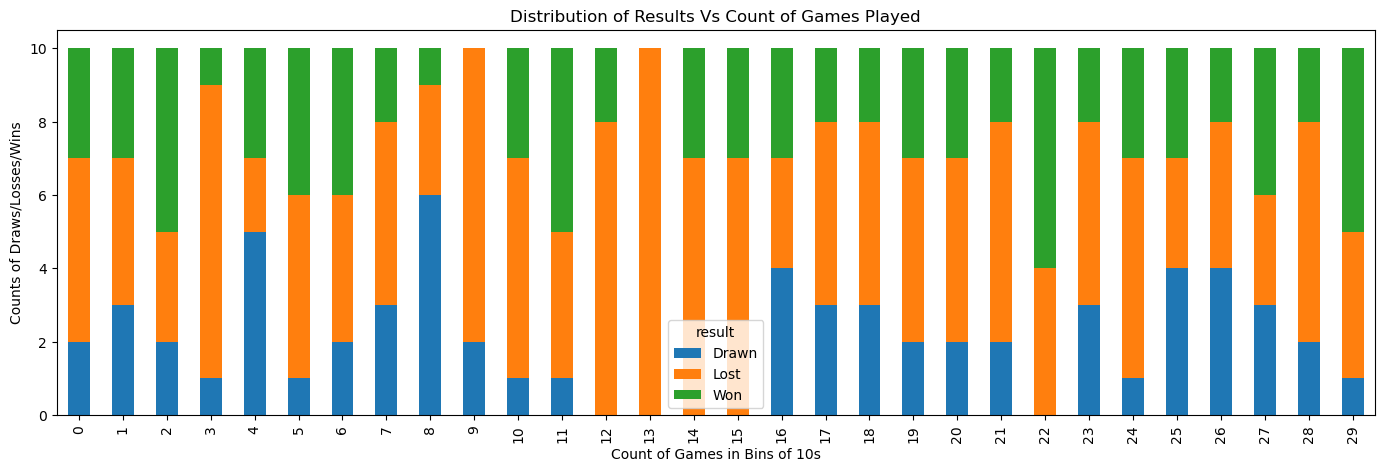

In [25]:
bins = np.arange(1, game_counter/10) * 10
data_for_graph['game_counter_bins'] = np.digitize(data_for_graph["game_counter"], bins, right=True)
counts = data_for_graph.groupby(['game_counter_bins', 'result']).game_counter.count().unstack()
ax=counts.plot(kind='bar', stacked=True,figsize=(17,5))
ax.set_xlabel("Count of Games in Bins of 10s")
ax.set_ylabel("Counts of Draws/Losses/Wins")
ax.set_title('Distribution of Results Vs Count of Games Played')

In [26]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

C:\Users\SRAVA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
from keras.models import load_model
model = load_model('my_model.h5')

In [28]:
model = load_model('my_model.h5')
print("___________________________________________________________________")
print("Welcome to the Tic Tac Toe Game")
print("You will be playing against the self learned Program")
print("When it is your move, enter the coordinates in the form rownumber,columnnumber")
print(" For example, to place 0 at the top right corner, enter 0,2")
print("___________________________________________________________________")

play_again="Y"
while(play_again=="Y"):
    print("___________________________________________________________________")
    print("Starting a new Game")
    game=tic_tac_toe_game()
    game.toss()
    print(game.board)
    print(game.turn_monitor," has won the toss")

    while(1):
        if game.game_status()=="In Progress" and game.turn_monitor==0:
            print("Your Turn")
            while(1):
                try:
                    print('Enter where you would like to place a 0 in the form rownumber,columnnumber: ')
                    instr = input()
                    inList = [int(n) for n in instr.split(',')] 
                    coord = tuple(inList)
                    print(coord)
                    game_status,board=game.move(0,coord)
                    print(board)
                    break
                except:
                    print("Invalid Move")
        elif game.game_status()=="In Progress" and game.turn_monitor==1:
            print("Program's turn")
            chosen_move,new_board_state,score=move_selector(model,game.board,game.turn_monitor)
            game_status,board=game.move(game.turn_monitor,chosen_move)
            print(board)
        else:
            break

    if game_status=="Won" and (1-game.turn_monitor)==1: 
        print("Program has won")
    if game_status=="Won" and (1-game.turn_monitor)==0:
        print("You has won")
    if game_status=="Drawn":
        print("Game Drawn")
    print("Would you like to play again?Y/N")
    play_again=input()

___________________________________________________________________
Welcome to the Tic Tac Toe Game
You will be playing against the self learned Program
When it is your move, enter the coordinates in the form rownumber,columnnumber
 For example, to place 0 at the top right corner, enter 0,2
___________________________________________________________________
___________________________________________________________________
Starting a new Game
[[2 2 2]
 [2 2 2]
 [2 2 2]]
0  has won the toss
Your Turn
Enter where you would like to place a 0 in the form rownumber,columnnumber: 
1,2
(1, 2)
[[2 2 2]
 [2 2 0]
 [2 2 2]]
Program's turn
1/1 [==============================] - 0s 23ms/step
[[2 2 2]
 [2 2 0]
 [1 2 2]]
Your Turn
Enter where you would like to place a 0 in the form rownumber,columnnumber: 
2,2
(2, 2)
[[2 2 2]
 [2 2 0]
 [1 2 0]]
Program's turn
1/1 [==============================] - 0s 23ms/step
[[2 2 2]
 [2 1 0]
 [1 2 0]]
Your Turn
Enter where you would like to place a 0 in the form 